In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Exercise 1

In [14]:
data = pd.read_csv("insurance.csv")
#print(data.head())

corrM = np.corrcoef(data["charges"], data["children"])
print(corrM, " - Correlation Matrix")
print("Pearson correlation Coefficient for the variables, Charges and Children, is : ", corrM[0][1])

[[1.         0.06799823]
 [0.06799823 1.        ]]  - Correlation Matrix
Pearson correlation Coefficient for the variables, Charges and Children, is :  0.0679982268479047


# Exercise 2

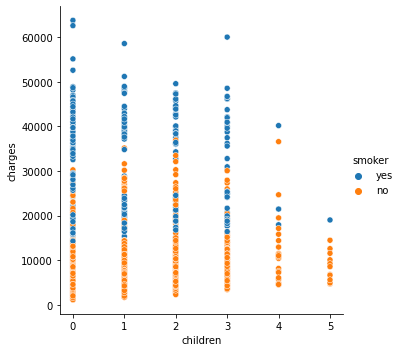

In [15]:
sns.relplot(data=data, x="children", y="charges", hue="smoker")
plt.show()

# Exercise 3

In [16]:
## Simple Linear regression

slope, intercept, r_value, p_value, std_err = stats.linregress(data["children"],data["charges"])
print("Slope : ", slope)
print("Intercept : ", intercept)
print("R-value : ", r_value)
print("P-value : ", p_value)
print("STD err : ", std_err)

Slope :  683.0893824813618
Intercept :  12522.4955496441
R-value :  0.0679982268479047
P-value :  0.01285212852013665
STD err :  274.20183261267965


Best fit line equation will be: Y = 683.089X + 12522.49 

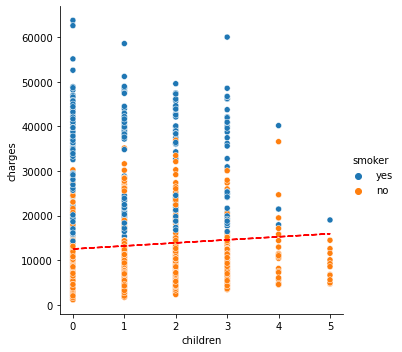

In [17]:
sns.relplot(data=data, x="children", y="charges", hue="smoker")

z = np.polyfit(data["children"], data["charges"], 1)
p = np.poly1d(z)
plt.plot(data["children"],p(data["children"]),"r--")

plt.show()

In [18]:
## Multiple Linear regression

x = data[['age','bmi','children']]
y = data['charges']

xN = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, xN).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           8.80e-37
Time:                        20:40:02   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.0